In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.rcParams['font.family']     = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
import numpy as np 
# set the style of the axes and the text color
#plt.rcParams["axes.labelweight"] = "bold"
#plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=1.5
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
csfont = {'fontname':'Arial','fontsize':25}
tickfont = {'fontname':'Arial','fontsize':16}

In [4]:
excelsheet = pd.ExcelFile('/anvil/projects/x-cis220051/corporate/molecular-stethoscope/Teams/Team-2/ClusterMarkers_1819ADcohort-Copy1.congregated_DR.xlsx')
# Get Sheets
Phenotype = excelsheet.parse(excelsheet.sheet_names[0])
TPMs = excelsheet.parse(excelsheet.sheet_names[-1])
TPMs = TPMs[~TPMs.Coeff.isna()]
Coeff = TPMs['Coeff'].values
Phenotype = Phenotype.dropna()
Phenotype = Phenotype.set_index('Isolate ID')

df = pd.read_csv('../data/AD_sort_by_AD_over_NCI_v3_pop.csv')
df = df.set_index('Unnamed: 0')
df = df.sort_index()

genes = TPMs.gene_id.str.split('.',expand=True)
genes = genes.iloc[:,0]
TPMs['gene_id'] = genes
TPMs = TPMs.set_index('gene_id')
TPMs = TPMs.sort_index()
TPMs = TPMs.loc[df.index.tolist(),:]
tmp = TPMs.reset_index()
tmp = tmp.drop(['gene_id','Description', 'ORI', 'MIN', 'MAX', 'AVG', 'Coeff'],axis = 1)
tmp = tmp.dropna(axis = 1)
df['Set Avg. TPM'] = TPMs.AVG

In [5]:
totmean = []
totdiff = []
totdata = []
for i in range(len(df)):
    AD = df['AD average TPM'][i]
    ADs = np.random.normal(AD,.1*AD,(1,100))
    ADs = ADs.clip(min=0).tolist()[0]
    NCI = df['NCI average TPM'][i]
    NCIs = np.random.normal(NCI,.1*NCI,(1,100))
    NCIs = NCIs.clip(min=0).tolist()[0]
    ADs += NCIs
    totmean += [np.mean(ADs)]
    totdiff += [np.abs(df['Set Avg. TPM'][i]-np.mean(ADs))]
    totdata += [ADs]
    

df['Tot. Avg. TPM'] = totmean
df['Diff'] = totdiff
df['Per Diff'] = df['Diff']/df['Set Avg. TPM']

totdata = pd.DataFrame(totdata)

In [6]:
simulatedscale = StandardScaler()
datascale = StandardScaler()
print(totdata.T.shape)
simulatedZ_sim = simulatedscale.fit_transform(totdata.T)
simulatedZ_data = simulatedscale.transform(tmp.T)

dataZ_data = datascale.fit_transform(tmp.T)
dataZ_sim = datascale.transform(totdata.T)

(200, 965)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


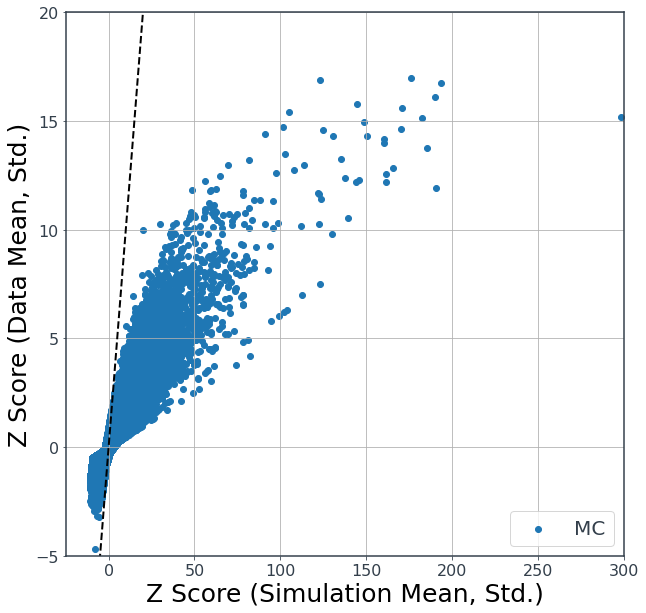

In [7]:
diff = np.abs(simulatedZ_data - dataZ_data)
data = dict()
data['simulatedZ_data'] = simulatedZ_data.flatten()
data['dataZ_data'] = dataZ_data.flatten()
data = pd.DataFrame(data)

fig,ax = plt.subplots(figsize=(10,10))

plt.scatter(data['simulatedZ_data'],data['dataZ_data'],label = 'MC')
plt.yticks(**tickfont)
plt.xticks(**tickfont)
plt.xlabel('Z Score (Simulation Mean, Std.)',**csfont)
plt.ylabel('Z Score (Data Mean, Std.)',**csfont)
plt.grid()
plt.plot([-25,300],[-25,300],'--k',linewidth = 2)
plt.legend(loc=4,fontsize = 20)
plt.xlim([-25,300])
plt.ylim([-5,20])

plt.show()

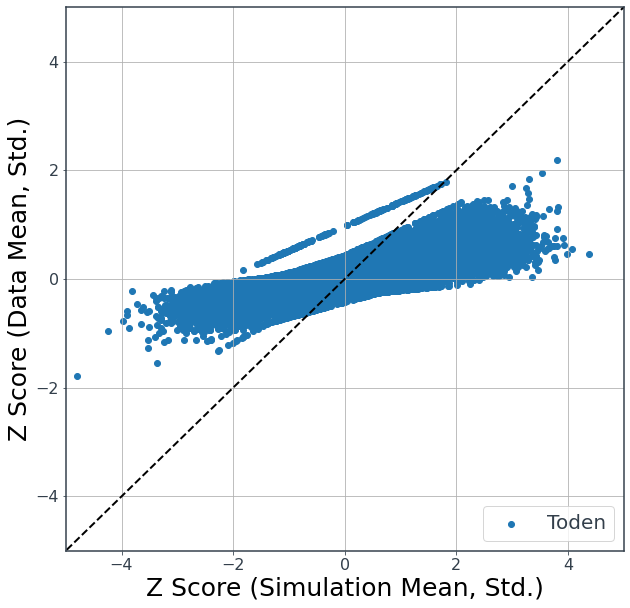

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
diff = np.abs(simulatedZ_sim - dataZ_sim)
data = dict()
data['simulatedZ_sim'] = simulatedZ_sim.flatten()
data['dataZ_sim'] = dataZ_sim.flatten()
data = pd.DataFrame(data)
plt.scatter(data['simulatedZ_sim'],data['dataZ_sim'],label = 'Toden')
plt.yticks(**tickfont)
plt.xticks(**tickfont)
plt.xlabel('Z Score (Simulation Mean, Std.)',**csfont)
plt.ylabel('Z Score (Data Mean, Std.)',**csfont)
plt.grid()
plt.plot([-25,300],[-25,300],'--k',linewidth = 2)
plt.legend(loc=4,fontsize = 20)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

(-1.0, 3250.0)

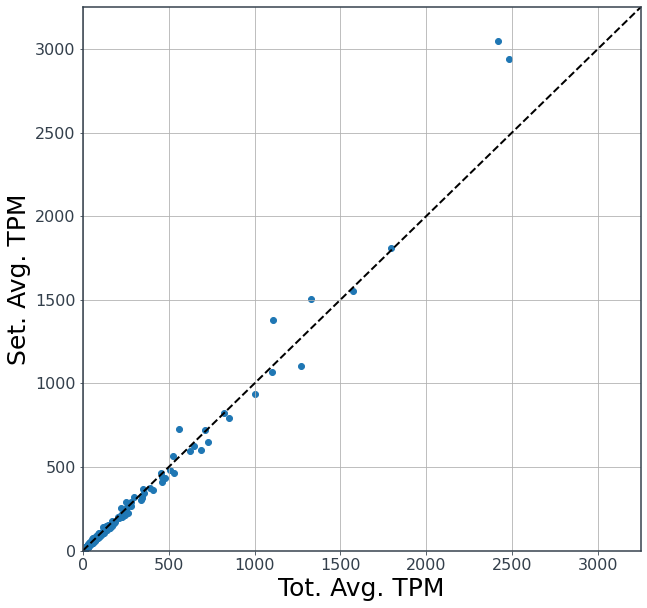

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
plt.scatter(df['Tot. Avg. TPM'],df['Set Avg. TPM'])
plt.yticks(**tickfont)
plt.xticks(**tickfont)
plt.xlabel('Tot. Avg. TPM',**csfont)
plt.ylabel('Set. Avg. TPM',**csfont)
plt.grid()
plt.plot([0,3500],[0,3500],'--k',linewidth = 2)
plt.xlim([-1,3250])
plt.ylim([-1,3250])


